In [2]:
# ich wollte es hier mal von unserem Datenset losgelöst auspobieren
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [3]:
#Datensatz mit 2 Spalten und ?? Reihen zufällig generieren
n_samples=10
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.40162301 0.38263715]
 [0.65881515 0.20575852]
 [0.76954992 0.96764041]
 [0.62970669 0.38805852]
 [0.61753098 0.32152243]
 [0.54804903 0.23813891]
 [0.65957211 0.49706243]
 [0.04150216 0.53009706]
 [0.76191169 0.81623238]
 [0.2667226  0.24242011]]


0.9676404086031879

In [4]:
data.shape

(10, 2)

In [5]:
f1=data[0:((n_samples)), 0]

In [6]:
print(f1)

[0.40162301 0.65881515 0.76954992 0.62970669 0.61753098 0.54804903
 0.65957211 0.04150216 0.76191169 0.2667226 ]


In [7]:
f2=data[0:((n_samples)),1]

In [8]:
print(f2)

[0.38263715 0.20575852 0.96764041 0.38805852 0.32152243 0.23813891
 0.49706243 0.53009706 0.81623238 0.24242011]


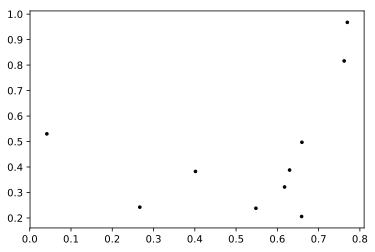

In [9]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [10]:
print (X)

[[0.40162301 0.38263715]
 [0.65881515 0.20575852]
 [0.76954992 0.96764041]
 [0.62970669 0.38805852]
 [0.61753098 0.32152243]
 [0.54804903 0.23813891]
 [0.65957211 0.49706243]
 [0.04150216 0.53009706]
 [0.76191169 0.81623238]
 [0.2667226  0.24242011]]


In [11]:
# number of clusters
k=4

#initialization, Coordinates of random centroids

#choose some points of the data

xAchsemax= f1.max()
xAchsemin = f1.min()

print(xAchsemax)
print(xAchsemin)

yAchsemax = f2.max()
yAchsemin = f2.min()

print(yAchsemax)
print(yAchsemin)

cx = np.random.randint(((xAchsemin)),((xAchsemax)),size=k)
cy = np.random.randint(((yAchsemin)),((yAchsemax)),size=k)


print(cx)
print(cy)

#Koordinaten der Punkte bestimmen




0.7695499220317894
0.04150215730366824
0.9676404086031879
0.20575852211132717


ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [12]:
# dieser Bereich ist hier leer, da zwischen 0 und 1 keine natürliche Zahl
# könnte man das so für unseren Datensatz verwenden?

In [13]:
# daher zufällige Zahl zwischen 0 und 1 auswählen -> Koordinaten der zufälligen Centroiden

cx1 = np.random.random((k,1))



cy1 = np.random.random((k,1))




C = np.array(list(zip(cx1, cy1)), dtype=np.float32)

print(C)

[[[0.91868305]
  [0.69603825]]

 [[0.68526125]
  [0.09473258]]

 [[0.6410645 ]
  [0.32988432]]

 [[0.5888903 ]
  [0.26503497]]]


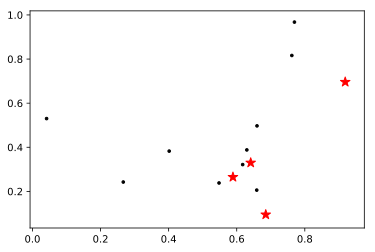

In [14]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

In [15]:
# Distanz Punkte - Centroids berechnen
#dist = (((cx1-f1)**2 + (cy1-f2)**2)*0.5)

In [16]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [17]:
dist(X[1],C)

array([[0.26252025, 0.8652373 ],
       [0.56470218, 0.49218861],
       [0.32940944, 0.45265719],
       [0.39994039, 0.38769017]])

In [32]:
# Datenpunkte hier noch keinem Cluster zugeordnet
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
C_old = np.zeros(C.shape)

In [20]:
error = dist(C, C_old, None)

In [21]:
from copy import deepcopy

In [ ]:
#while error != 0:
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [30]:
#im ersten Schritt wird für jeden Punkt die euklidische Distanz zu allen Centern ausgerechnet
    
for i in range(len(X)):
     distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
     print(distances)

[[0.60462493]
 [0.40415304]
 [0.24518383]
 [0.2211319 ]]
[[0.55489233]
 [0.11413219]
 [0.12538859]
 [0.09166886]]
[[0.30985227]
 [0.87696788]
 [0.65056999]
 [0.72546005]]
[[0.42232549]
 [0.29854048]
 [0.05927258]
 [0.12961778]]
[[0.48057741]
 [0.23668761]
 [0.024975  ]
 [0.0633334 ]]
[[0.58910215]
 [0.1984756 ]
 [0.1306488 ]
 [0.04890203]]
[[0.32669532]
 [0.40314916]
 [0.16819944]
 [0.24255445]]
[[0.89273891]
 [0.77715377]
 [0.63210775]
 [0.60818723]]
[[0.19754466]
 [0.72555997]
 [0.50113717]
 [0.57771531]]
[[0.79424291]
 [0.44383126]
 [0.38442409]
 [0.32296047]]


In [31]:
 # nächster Zentroid eines Datenpunktes -> z.B. erster Datenpunkt liegt am nächsten am dritten Zentroid
    for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            print(cluster)

3
3
0
2
2
3
2
3
0
3


In [33]:
#Datenpunkte in Cluser eingeteilt -> zugehöriger array erstellt
for i in range(len(X)):
            distances = ( ((f1[i]-cx1)**2)+((f2[i]-cy1)**2) )**(1/2)
            cluster = np.argmin(distances)
            clusters[i]=cluster
            print(clusters)
            

[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3. 0. 2. 0. 0. 0. 0. 0. 0.]
[3. 3. 0. 2. 2. 0. 0. 0. 0. 0.]
[3. 3. 0. 2. 2. 3. 0. 0. 0. 0.]
[3. 3. 0. 2. 2. 3. 2. 0. 0. 0.]
[3. 3. 0. 2. 2. 3. 2. 3. 0. 0.]
[3. 3. 0. 2. 2. 3. 2. 3. 0. 0.]
[3. 3. 0. 2. 2. 3. 2. 3. 0. 3.]


In [38]:
np.mean(X[1])

0.4322868374642239